## Problem Statement:
    treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [2]:
fraud=pd.read_csv('D:\\ExcelR\\Assignments\\Downloaded\\Decision Tree\\Fraud_check.csv')

In [3]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
fraud.loc[fraud["Taxable.Income"]>=30000,"Income"]="Good"
fraud.loc[fraud["Taxable.Income"]<=30000,"Income"]="Risky"

In [5]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for column_name in fraud.columns:
    if fraud[column_name].dtype == object:
        fraud[column_name] = le.fit_transform(fraud[column_name])
    else:
        pass

In [6]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        600 non-null    int32
 1   Marital.Status   600 non-null    int32
 2   Taxable.Income   600 non-null    int64
 3   City.Population  600 non-null    int64
 4   Work.Experience  600 non-null    int64
 5   Urban            600 non-null    int32
 6   Income           600 non-null    int32
dtypes: int32(4), int64(3)
memory usage: 23.6 KB


##### -- Data has no null values.

In [7]:
#Droping the Taxable income variable - we taken that as Income description
fraud.drop(["Taxable.Income"],axis=1,inplace=True)

In [8]:
fraud

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Income
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0
...,...,...,...,...,...,...
595,1,0,39492,7,1,0
596,1,0,55369,2,1,0
597,0,0,154058,0,1,0
598,1,1,180083,17,0,0


In [9]:
x= fraud.iloc[:,0:5]
y= fraud.iloc[:,5]

In [10]:
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [11]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Income, Length: 600, dtype: int32

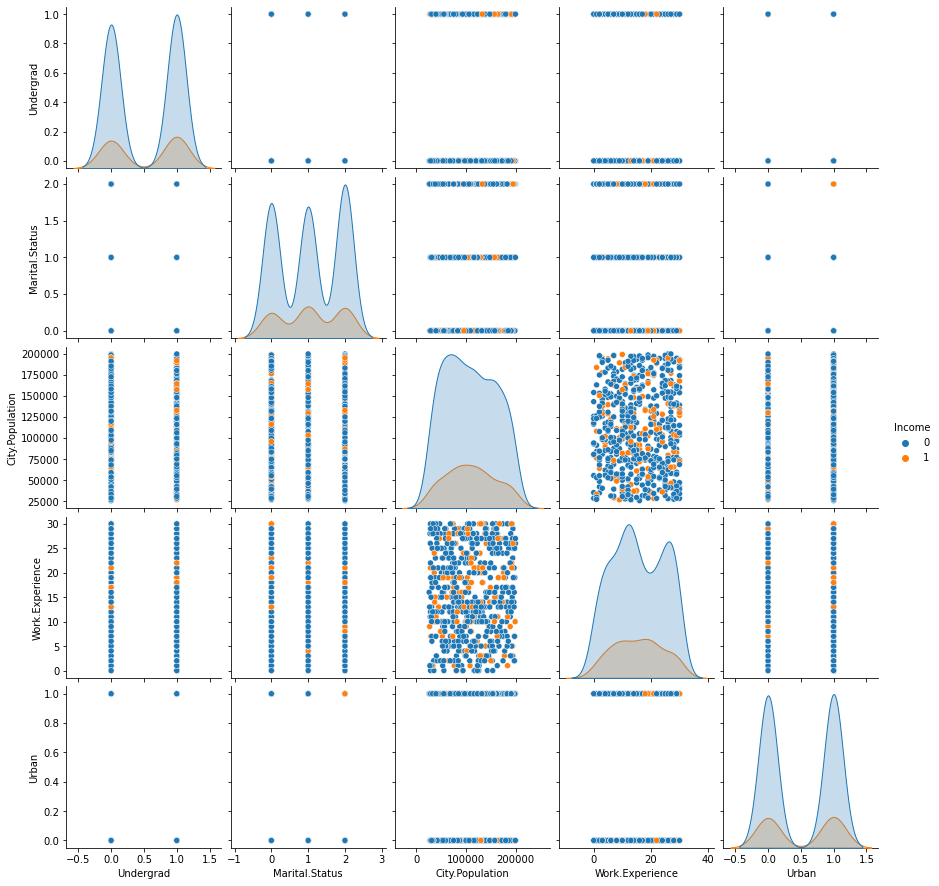

In [12]:
import seaborn as sns
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=fraud, hue = 'Income')

<AxesSubplot:>

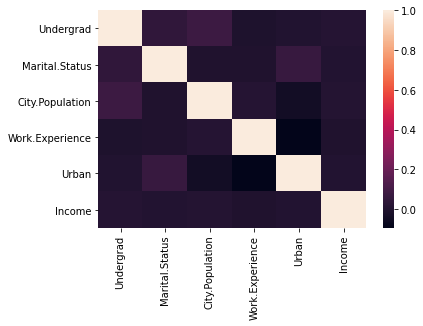

In [13]:
#correlation matrix by heat map
sns.heatmap(fraud.corr())

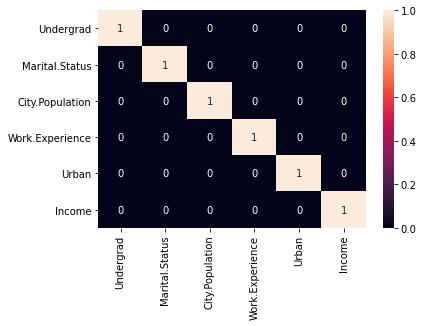

In [14]:
sns.heatmap(fraud.corr()>0.6, annot = True)
plt.show()

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, stratify =y, random_state = 10)

#### Building Decision Tree Classifier using Entropy Criteria

In [16]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

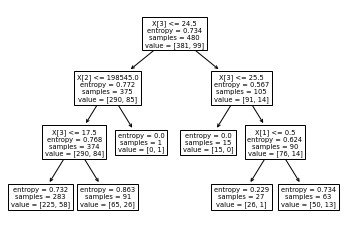

In [17]:
#PLot the decision tree
tree.plot_tree(model);

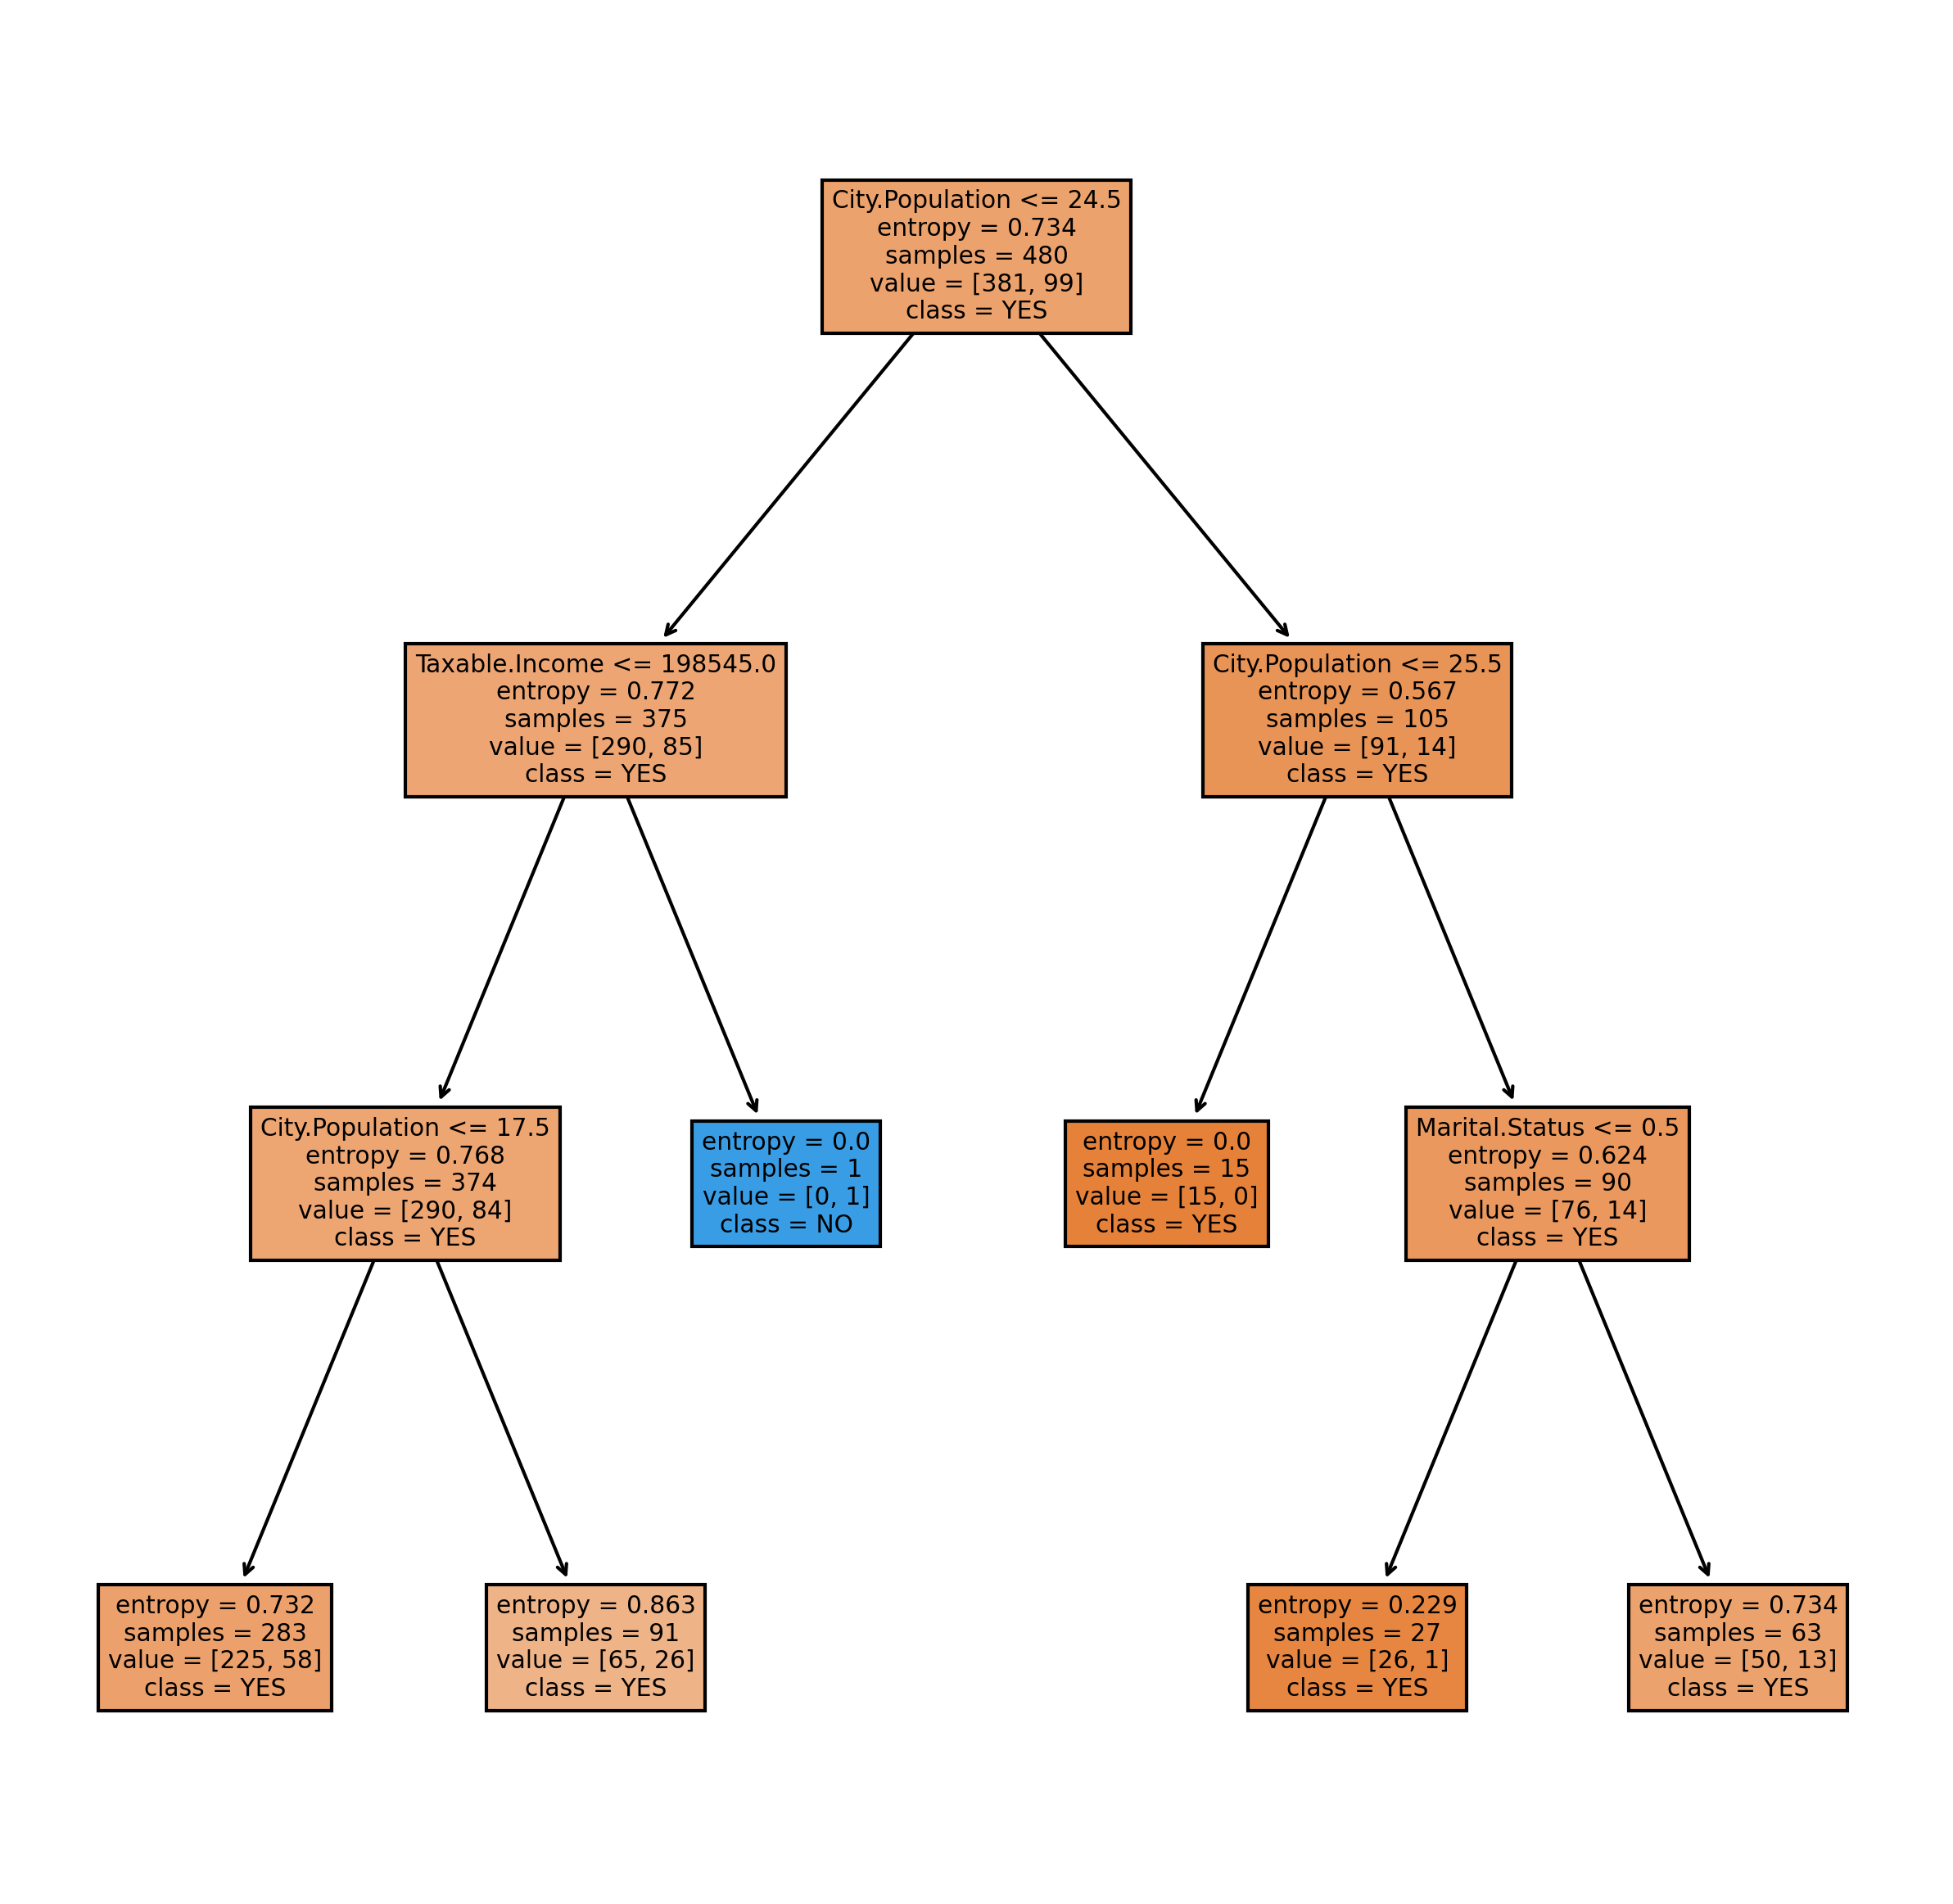

In [18]:
fn=['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban']
cn=['YES','NO']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [19]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each categor

0    119
1      1
dtype: int64

In [20]:
#Here first column is for 'Good', & second is for 'Risky'
model.predict_proba(x_test)

array([[0.795053  , 0.204947  ],
       [0.795053  , 0.204947  ],
       [0.96296296, 0.03703704],
       [0.71428571, 0.28571429],
       [0.795053  , 0.204947  ],
       [0.795053  , 0.204947  ],
       [0.795053  , 0.204947  ],
       [0.71428571, 0.28571429],
       [0.795053  , 0.204947  ],
       [0.96296296, 0.03703704],
       [0.71428571, 0.28571429],
       [0.795053  , 0.204947  ],
       [0.795053  , 0.204947  ],
       [0.795053  , 0.204947  ],
       [0.795053  , 0.204947  ],
       [0.96296296, 0.03703704],
       [0.71428571, 0.28571429],
       [0.96296296, 0.03703704],
       [0.795053  , 0.204947  ],
       [0.795053  , 0.204947  ],
       [0.795053  , 0.204947  ],
       [0.79365079, 0.20634921],
       [0.795053  , 0.204947  ],
       [0.71428571, 0.28571429],
       [0.795053  , 0.204947  ],
       [0.795053  , 0.204947  ],
       [0.71428571, 0.28571429],
       [1.        , 0.        ],
       [0.71428571, 0.28571429],
       [0.71428571, 0.28571429],
       [0.

In [21]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
Income,,
0,94,1
1,25,0


In [22]:
# Accuracy 
np.mean(preds==y_test)

0.7833333333333333

### Building Decision Tree Classifiers using Gini Criteria

In [23]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [24]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [25]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.7833333333333333

### Conclustion:-
    As we can see we got 78% accuracy fot this model